# Applied Math Lab 11 - Fourier Series

## Fourier series for a Sqaure Wave

Consider the following periodic function of alternating values between $1$ and $-1$

![](signal-square-wave-01.svg)

Assume a single period is between $-\pi$ and $\pi$

$f(x)=\left\{\begin{array}{lr} 1 & : 0 \leq x < \pi \\ -1 & : -\pi <x<0 \end{array}\right\}$

The fourier series for this function looks like this:

 $\sum\limits_{n={1,3,5...}}^\inf \dfrac{4}{\pi n} sin(nx)$

We can see that the sum is a sum of sine waves.  We can think of a sine wave as the distance traveled by the point rotating around a circle. In this case, adding more terms means turning circles with smaller radius around the previous circle (term).

![](Fourier_series_square_wave_circles_animation.gif) 

## drawing circles and lines

The following code shows how to draw an animation of the first term (circle)

In [2]:
import numpy as  np
import matplotlib.pyplot as plt
from matplotlib import animation

First we get a figure and an axis and make it look nice

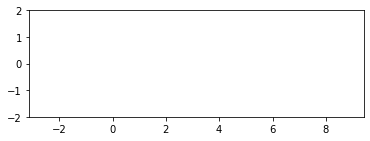

In [3]:
# create a figure
fig = plt.figure()  # type: plt.Figure
# get the axis on which we draw on
ax = fig.gca()  # type: plt.Axes
# set the axis limits to be nice and tidy
ax.set_xlim(-np.pi, 3 * np.pi)
ax.set_ylim(-2, 2)
# prevent our drawing from looking squishy
ax.set_aspect('equal')

The first term $\dfrac{4}{\pi}sin(\theta)$ is a circle with radius $\dfrac{4}{\pi}$. We can draw a circle using `plt.Circle(...)` and add it to our plot using `ax.add_artist(...)`.  
The center of the circle will be `(0,0)`  
The radius will be $\dfrac{4}{\pi}$  
also it should have no fill

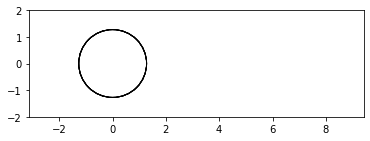

In [18]:
# ----------------- continuation of the previous code  ---------- #
circle = plt.Circle((0,0),4/np.pi,fill=0)
ax.add_artist(circle)
fig # show the plot again for jupyter (not needed in pycharm)

Next, we want to draw a radius from the center of the circle `(0,0)` with angle `0`

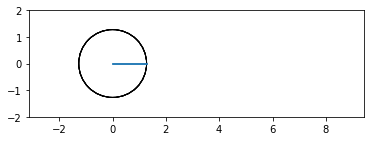

In [20]:
line = plt.Line2D([0,circle.radius],[0,0])
ax.add_artist(line)
fig # show the plot again for jupyter (not needed in pycharm)

We can now rotate the radius of the circle around by setting calculating a different angle  
We can use matplotlib's animation to do this.

In [26]:
steps = 20
angles = np.linspace(0,2*np.pi,steps)

def update(frame):
    t = angles[frame] # get the angle
    cx,cy = circle.center
    r = circle.radius
    new_x = r * np.cos(t) # cartesian to polar
    new_y = r * np.sin(t) # cartesian to polar
    line.set_data([cx,new_x],[cy,new_y])
    return

anim = animation.FuncAnimation(fig,update,frames=steps,interval=100)
plt.show()

It should look like this:

![](one-term-anim.gif)

Now we can add a pin that will be our drawing pencil

In [29]:
# ==== added code below  ==== #
pencil = plt.Line2D([],[]) # just empty line for now, will update later
ax.add_artist(pencil)
# ==== added code above  ==== #
steps = 20
angles = np.linspace(0,2*np.pi,steps)

def update(frame):
    t = angles[frame] # get the angle
    cx,cy = circle.center
    r = circle.radius
    new_x = r * np.cos(t) # cartesian to polar
    new_y = r * np.sin(t) # cartesian to polar
    line.set_data([cx,new_x],[cy,new_y]) 
    # ==== added code below  ==== #
    pencil.set_data([new_x,np.pi],[new_y,new_y]) # pi was chosen arbitrarily
    # ==== added code above  ==== #
    return

anim = animation.FuncAnimation(fig,update,frames=steps,interval=100)
plt.show()

It should look like this:

![](one-term-pencil-anim.gif)

for the last step we can add the actual wave using the point's path

In [32]:
pencil = plt.Line2D([],[]) # just empty line for now, will update later
ax.add_artist(pencil)
steps = 20
# ==== added code below  ==== #
wave_x = np.linspace(np.pi, 3*np.pi, steps)
wave_y = np.zeros(200)
wave = plt.Line2D(wave_x,wave_y)
ax.add_artist(wave)
# ==== added code above  ==== #
angles = np.linspace(0,2*np.pi,steps)

def update(frame):
    t = angles[frame] # get the angle
    cx,cy = circle.center
    r = circle.radius
    new_x = r * np.cos(t) # cartesian to polar
    new_y = r * np.sin(t) # cartesian to polar
    line.set_data([cx,new_x],[cy,new_y]) 
    pencil.set_data([new_x,np.pi],[new_y,new_y]) # pi was chosen arbitrarily
    # ==== added code below  ==== #
        # x axis stays the same, y axis should be updated with new_y
        # we first need to shift all values to the right
    wave_y[1:] = wave_y[:-1] # copy every element to the right
    wave_y[0] = new_y # add the latest point
    wave.set_ydata(wave_y)
    # ==== added code above  ==== #
    return

anim = animation.FuncAnimation(fig,update,frames=steps,interval=100)
plt.show()

It should look something like this:

![](one-term-wave-bad.gif)

We have two problems here:  
1. our angle is hitting $0$ and $2\pi$, which means it hits 0 twice
2. `funcAnimation` usually needs an init function to run before the animation.  
    since we didnt give it any, it calls our `update` function instead with `frame = 0` so we have an extra call to `update` 
    with frame `0` which means the angle `t` will be `0` as well.

We can fix `1` by recalculating the angles properly  
We can fix `2` by passing it an empty init function

In [33]:
pencil = plt.Line2D([],[]) # just empty line for now, will update later
ax.add_artist(pencil)
steps = 20
wave_x = np.linspace(np.pi, 3*np.pi, steps)
wave_y = np.zeros(200)
wave = plt.Line2D(wave_x,wave_y)
ax.add_artist(wave)

# ==== updated code below  ==== #
# calculate steps + 1  values and remove the last value
angles = np.linspace(0,2*np.pi,steps + 1)[:steps]
# ==== updated code above  ==== #
def update(frame):
    t = angles[frame] # get the angle
    cx,cy = circle.center
    r = circle.radius
    new_x = r * np.cos(t) # cartesian to polar
    new_y = r * np.sin(t) # cartesian to polar
    line.set_data([cx,new_x],[cy,new_y]) 
    pencil.set_data([new_x,np.pi],[new_y,new_y]) # pi was chosen arbitrarily
    # x axis stays the same, y axis should be updated with new_y
    # we first need to shift all values to the right
    wave_y[1:] = wave_y[:-1] # copy every element to the right
    wave_y[0] = new_y # add the latest point
    wave.set_ydata(wave_y)
    return
# ==== updated code below  ==== #
# pass an empty lambda function as init_func
anim = animation.FuncAnimation(fig,update,init_func=lambda:None,frames=steps,interval=100)
# ==== updated code above  ==== #
plt.show()

It should now look like this:

![](one-term-wave-good.gif)

The whole code should look like this:

In [34]:
def square_wave():
    fig = plt.figure()  # type: plt.Figure
    ax = fig.gca()  # type: plt.Axes
    ax.set_xlim(-np.pi, 3 * np.pi)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    circle = plt.Circle((0, 0), 4 / np.pi, fill=0)
    ax.add_artist(circle)
    line = plt.Line2D([0, circle.radius], [0, 0])
    ax.add_artist(line)
    pencil = plt.Line2D([], [])
    ax.add_artist(pencil)
    steps = 20
    wave_x = np.linspace(np.pi, 3 * np.pi, steps)
    wave_y = np.zeros(steps)
    wave = plt.Line2D(wave_x, wave_y)
    ax.add_artist(wave)
    angles = np.linspace(0, 2 * np.pi, steps + 1)[:steps]
    def update(frame):
        t = angles[frame]  # get the angle
        cx, cy = circle.center
        r = circle.radius
        new_x = r * np.cos(t)  # cartesian to polar
        new_y = r * np.sin(t)  # cartesian to polar
        line.set_data([cx, new_x], [cy, new_y])
        pencil.set_data([new_x, np.pi], [new_y, new_y])  # pi was chosen arbitrarily
        wave_y[1:] = wave_y[:-1]  # copy every element to the right
        wave_y[0] = new_y  # add the latest point
        wave.set_ydata(wave_y)
        return
    
    anim = animation.FuncAnimation(fig, update, init_func=lambda: None, frames=steps, interval=100)
    plt.show()


## Addding the second term

Adding another term means adding a new circle and the center of this circle should be on the previous circle's radius end.  
since the second term is $\dfrac{4}{3\pi}sin(3\theta)$, we need to create a new circle with radius $\dfrac{4}{3\pi}$.

In [35]:
def square_wave():
    fig = plt.figure()  # type: plt.Figure
    ax = fig.gca()  # type: plt.Axes
    ax.set_xlim(-np.pi, 3 * np.pi)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    circle = plt.Circle((0, 0), 4 / np.pi, fill=0)
    ax.add_artist(circle)
    line = plt.Line2D([0, circle.radius], [0, 0])
    ax.add_artist(line)
    # ==== added code below  ==== #
    circle2 = plt.Circle((circle.radius,0),4 / (3 * np.pi),fill=0)
    ax.add_artist(circle2)
    line2 = plt.Line2D([circle.radius, circle.radius + circle2.radius], [0, 0])
    ax.add_artist(line2)
    # ==== added code above  ==== #
    pencil = plt.Line2D([], [])
    ax.add_artist(pencil)
    # ==== updated code below  ==== #
    # added more steps
    steps = 50
    # ==== updated code above  ==== #
    wave_x = np.linspace(np.pi, 3 * np.pi, steps)
    wave_y = np.zeros(steps)
    wave = plt.Line2D(wave_x, wave_y)
    ax.add_artist(wave)
    angles = np.linspace(0, 2 * np.pi, steps + 1)[:steps]
    def update(frame):
        t = angles[frame]  # get the angle
        cx, cy = circle.center
        r = circle.radius
        new_x = r * np.cos(t)  # cartesian to polar
        new_y = r * np.sin(t)  # cartesian to polar
        line.set_data([cx, new_x], [cy, new_y])
        # ==== added code below  ==== #
        circle2.set_center((new_x, new_y)) # update the center of circle2
        
        # calculate line2 position with respect to the new center of circle 2
        r2 = circle2.radius 
        new_x2 = new_x + r2 * np.cos(3 * t) # cartesian to ploar for 2nd term 
        new_y2 = new_y + r2 * np.sin(3 * t) # cartesian to ploar for 2nd term
        line2.set_data([new_x, new_x2], [new_y, new_y2]) # calculate the radius line of circle2
        # ==== added code above  ==== #
        
        
        # ==== updated code below  ==== #
        # use the last circle to draw the line
        pencil.set_data([new_x2, np.pi], [new_y2, new_y2])
        wave_y[1:] = wave_y[:-1]  # copy every element to the right
        wave_y[0] = new_y2  # add the latest point
        # ==== updated code above  ==== #
        wave.set_ydata(wave_y)
        return
    
    anim = animation.FuncAnimation(fig, update, init_func=lambda: None, frames=steps, interval=100)
    plt.show()

It should look something like this:

![](two-term-wave-good.gif)